In [211]:
import numpy as np
from numpy.polynomial import Polynomial as poly
import sympy
sympy.init_printing()
var('x')
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange #Possível forma de fazer o lagrange
plt.style.use('seaborn-poster')
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

É possivel desenvolver uma função que possibilite inferir um valor para um ponto desconhecido.

Interpolar uma função 𝑓 (nem sempre conhecida) consiste em aproximar essa função
por uma função 𝑔. Assim, os valores de 𝑓 𝑥 podem ser estimados (com erro
controlado) por 𝑔 𝑥 , se 𝑥 está entre os valores observados fornecidos

# Interpolação Polinomial

    Temos uma função polinomial que intercepta a função f original nos pontos x0,x1,...xn. Sendo, portanto, p(xk) = f(xk). 
    Dessa forma obtemos um sistema de equações em que a0 + a1x0 + .... an*x0^n = f(x0)
    Essa matriz é denominada matriz de Vandermonde(suas linhas estão em PG) e se todos os x são distintos, a solução é única (det !=0)

In [212]:
#Exemplo
x = [-1,0,2]
fx = [4,1,-1]



   p2(x) = ao + a1x + a2x**2
   p2(-1) = f(-1) = 4 -> ao -a1 + a2 = 4
   p2(0) = 1 -> a0 = 1
   p2(2) = f(2) = -1 -> a0 + a1*2 + a2*4 = -1
   
   a0 = 1; a1 = -7/3 ; a2 = 2/3
   
   p(x) = 1-7x/3+2(x**2)/3

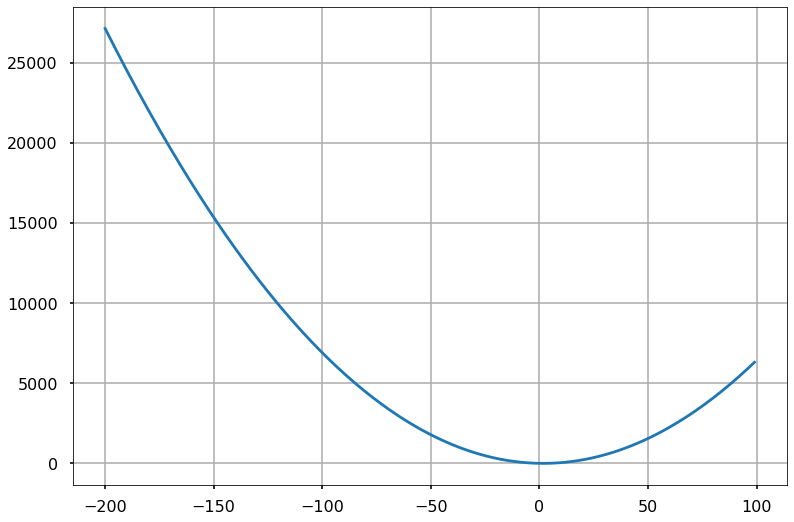

In [213]:
def interpolacao_sistema(x,fx):
    coef= np.array([[x[k]**n for n in range(len(fx))]for k in range(len(x))])
    return np.linalg.solve(coef,fx)

px = poly(interpolacao_sistema(x.copy(),fx.copy()))
plt.plot(r:=np.arange(-200,100,1),px(r))
plt.grid()
plt.show()

# Polinômio de Lagrange

Para grau 1(linear), p1(x) = y0L0(x) + y1L1(x)

p1(x0) = y0 ; p1(x1) = y1 Seguindo a mesma condição de existência do polinômio anterior

O polinômio de Lagrange é tal que será 1 em seu ponto determinado e 0 nos pontos restantes.

L0(x0) = 1, L0(x1) = 0
L1(x0) = 0, L1(x1) = 1

L0(x) = (x-x1)/ (x0 - x1)
L1(x) = (x-x0)/(x1 - x0)

Caso Geral com n+1 pontos, de x0 até xn
pn(xk) = y0L0(xk) + ... + ynLn(xk) = yk

Os polinômios de Lagrange Lk(x); k = 0,1,...,n
Lk(xk) = 1, else = 0

Lk(x) = (x-x0)(x-x1)...(x-x(k-1))(x-x(k+1))...(x-xn) 
/
(xk-x0)(xk-x1)...(xk-x(k-1))(xk-x(k+1))...(xk-xn)

#Pulou(x-xk) e (xk-xk)

In [214]:
#Gabarito Lagrange
xff = np.array([-1,0,2])
y=np.array([4,1,-1])
lag = lagrange(xff,y)
lag
#Começa pelo maior grau

poly1d([ 0.66666667, -2.33333333,  1.        ])

In [223]:
def Lagrange (xk, yk,show=False,a=-3,b=3,step=.1):
    """[summary]

    Args:
        Lx ([np.array]): [description]
        Ly ([np.array]): [description]

    Returns:
        Y=[Sympy.Poly]: The equation that describes the poly
        L=[List]: List of all parts of the Lagrange expression (L0,L1...Ln)
    """


    x=sympy.symbols('x')
    if  len(xk)!= len(yk):
        return -1 #Error
    Pk=0
    L=[]
    for k in range (len(xk)):
        Lk=1
        for j in range (len(xk)):
            if j != k:
                Lk*= ((x-xk[j]) /(xk[k]-xk[j])) #Cada fração
        Pk+= Lk*yk[k] #Total
        L.append(Lk)
    L=[sympy.Poly(z) for z in L]
    Pk=sympy.Poly(sympy.simplify(Pk))

    if show:
        Lcoeffs = [z.all_coeffs() for z in L]
        # get the polynomial function
        P = [poly(z[::-1]) for z in Lcoeffs]
    
        margin = np.arange(a,b, step)

        fig = plt.figure(figsize = (10,8))

        for z in P:
            plt.plot(margin, z(margin))
    

        plt.plot(xk, np.ones(len(xk)), 'ko', xk, np.zeros(len(xk)), 'ko')
        #plt.plot(margin,p(margin))
        plt.title('Lagrange Basis Polynomials')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.legend([f'P{n}' for n in range(len(xk))])
        plt.show()

    return Pk,L

exemple = np.array([-1,0,2])
yexemple = np.array([4,1,-1])
pk,L=Lagrange(exemple,yexemple,show=False)
(pk)#.all_coeffs()
#L


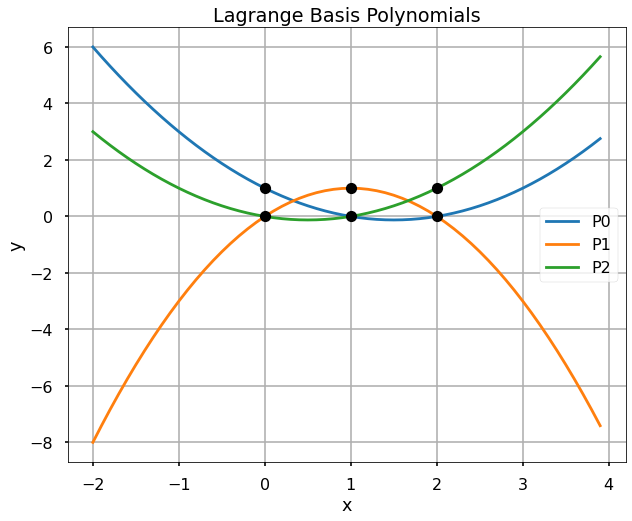

In [216]:
def show_lagrange(xk,yk,a=-3,b=3,step=.1):
    p,L = Lagrange(xk,yk)
    L = [z.all_coeffs() for z in L]
    # get the polynomial function
    P = [poly(z[::-1]) for z in L]
  
    margin = np.arange(a,b, step)

    fig = plt.figure(figsize = (10,8))

    for z in P:
        plt.plot(margin, z(margin))
   

    plt.plot(xk, np.ones(len(xk)), 'ko', xk, np.zeros(len(xk)), 'ko')
    #plt.plot(margin,p(margin))
    plt.title('Lagrange Basis Polynomials')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend([f'P{n}' for n in range(len(xk))])
    plt.show()

xs = np.array([0,1,2])
ys=np.array([1,3,2])

show_lagrange(xs,ys,-2,4,.1)

# Polinômios de Newton